**Nama**    : Johnson Rouslie Junior\
**Kelas**   : PYTN-KS09\
**Absensi** : 003

# Import Libraries

In [205]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Read CSV

In [206]:
bank_csv = pd.read_csv('dataset/bank.csv', delimiter=';')
bank_csv.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Exploratory & Cleaning Data

Pertama akan dilihat shape dari dataset ini terlebih dahulu.

In [207]:
bank_csv.shape

(4521, 17)

Dataset ini memiliki 4521 baris data dan 17 kolom. Setelah itu akan dilihat list kolom yang ada pada dataset dan juga akan dicek apakah data type value pada tiap kolom sudah tepat.

In [208]:
bank_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Setelah dilihat bahwa data type beberapa kolom adalah object dan bukan categorical seperti deskripsi datasetnya, maka ubah data type object tersebut menjadi categorical.

In [209]:
obj_col_list = bank_csv.columns[bank_csv.dtypes == 'object'].to_list()
for col in obj_col_list:
    bank_csv[col] = bank_csv[col].astype('category')
bank_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4521 non-null   category
 2   marital    4521 non-null   category
 3   education  4521 non-null   category
 4   default    4521 non-null   category
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   category
 7   loan       4521 non-null   category
 8   contact    4521 non-null   category
 9   day        4521 non-null   int64   
 10  month      4521 non-null   category
 11  duration   4521 non-null   int64   
 12  campaign   4521 non-null   int64   
 13  pdays      4521 non-null   int64   
 14  previous   4521 non-null   int64   
 15  poutcome   4521 non-null   category
 16  y          4521 non-null   category
dtypes: category(10), int64(7)
memory usage: 293.4 KB


Sekarang semua kolom telah memiliki data type yang tepat, maka akan dicek apakah ada missing values di dataset tersebut.

In [210]:
bank_csv.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Terlihat bahwa tidak ada missing values pada dataset tersebut. Sekarang akan dicek hasil statistik sederhana dari dataset tersebut untuk melihat apakah ada keanehan pada dataset.

In [211]:
bank_csv.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Jika dilihat, tidak ada keanehan value pada dataset tersebut dan sudah sesuai dengan logika tiap kolom. Sekarang dataset bisa dilakukan visualisasi dan analisa dengan aman.

# Visualization & Analysis Data

## Analysis by Job

**Visualization**

Visualisasi ini akan digunakan untuk mengecek berapa banyak yang membuka deposit berdasarkan bidang pekerjaan, dan juga mengecek berapa banyak rata - rata saldo dan mediannya untuk tiap bidang pekerjaan bagi mereka yang membuka deposit.

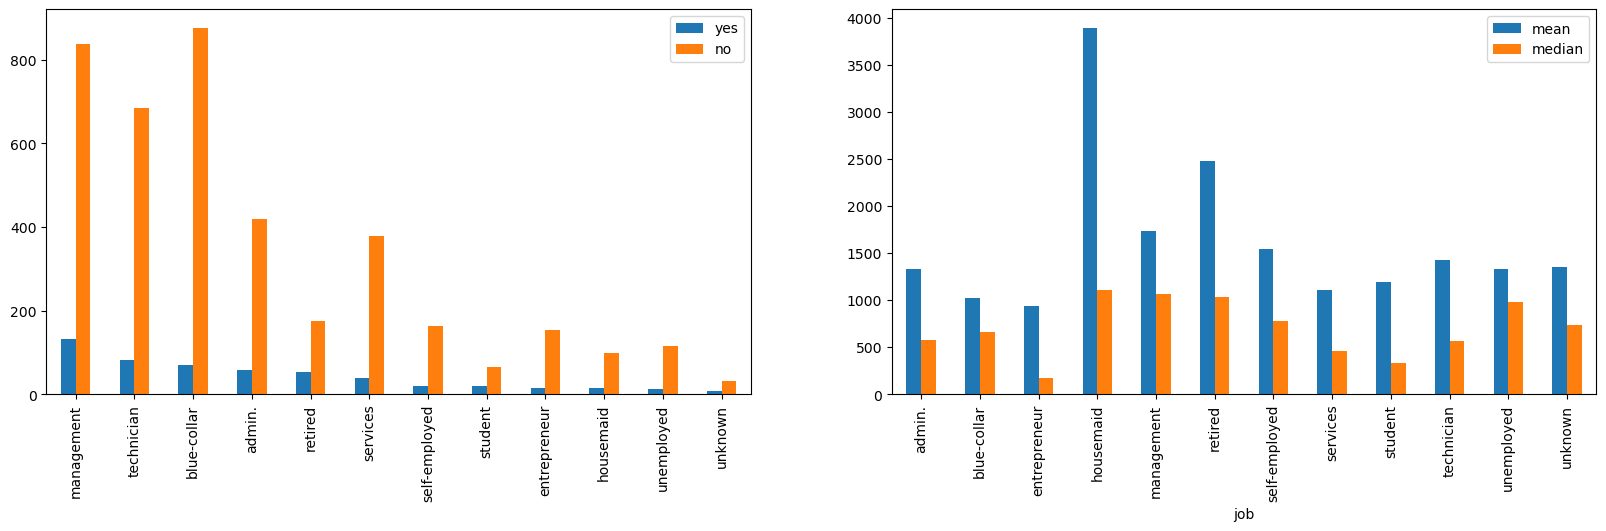

In [212]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

job_yn = pd.DataFrame()
job_yn['yes'] = bank_csv[bank_csv['y'] == 'yes']['job'].value_counts()
job_yn['no'] = bank_csv[bank_csv['y'] == 'no']['job'].value_counts()
job_yn.plot(kind='bar', ax=ax0)

job_balance = bank_csv[bank_csv['y'] == 'yes']
job_balance = job_balance.pivot_table(
    index='job',
    values='balance',
    aggfunc=[np.mean, np.median]
)
job_balance.plot(kind='bar', ax=ax1, figsize=(20, 5))
plt.legend(['mean', 'median'])

**Conclusion**

1. Bidang pekerjaan yang paling banyak diobservasi adalah management dan blue-collar
2. Kebanyakan dari mereka, untuk tiap bidang pekerjaan, menolak untuk membuka deposit
3. Management yang paling banyak membuka deposit
4. Bagi yang membuka deposit, bidang pekerjaan dengan rata - rata saldo dan median tertinggi adalah pada housemaid dan retired

## Analysis by Marital

**Visualization**

Menggunakan Pie Chart, akan dilihat seberapa banyak yg divorced, married, dan single.

Text(0.5, 1.0, 'Marital Percentage')

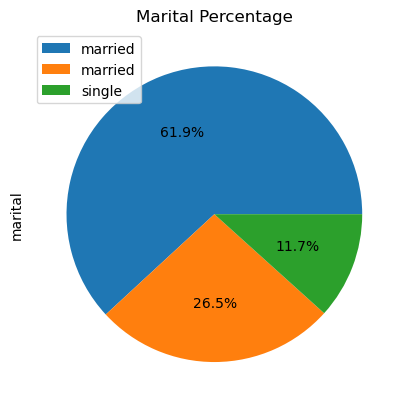

In [213]:
bank_csv['marital'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.legend(labels=bank_csv['marital'], loc='upper left')
plt.title('Marital Percentage')

Sama seperti job, disini akan dicek berapa banyak yang membuka deposit berdasarkan marital dan berapa banyak rata - rata balance dan mediannya.

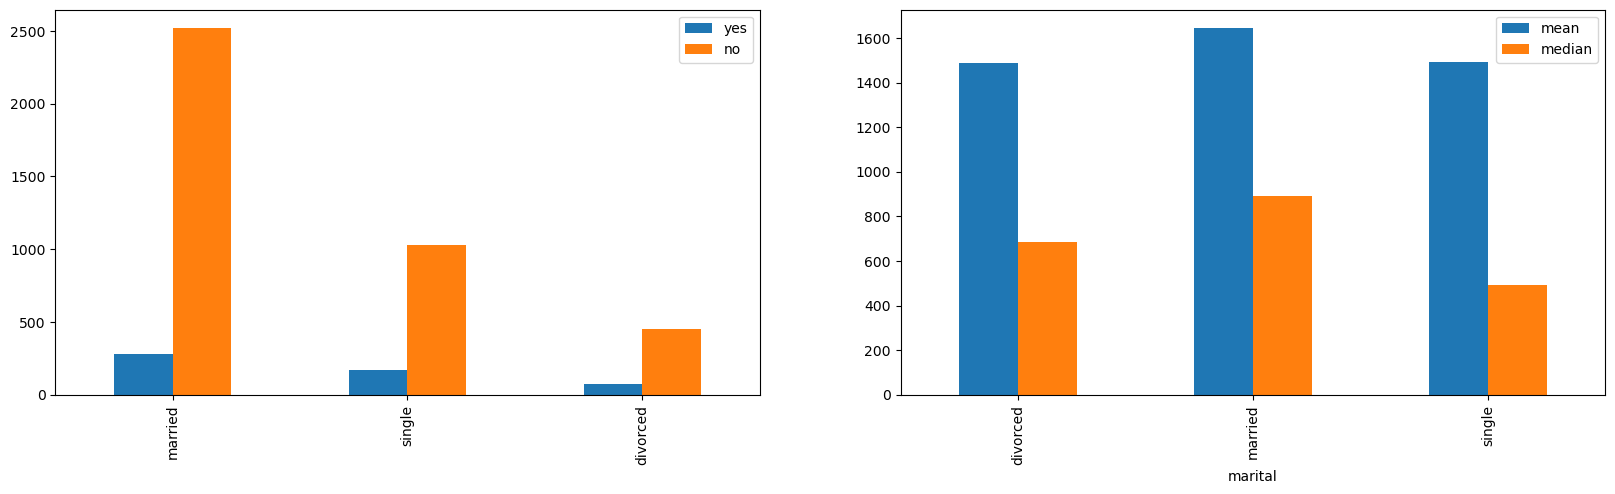

In [214]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

marital_yn = pd.DataFrame()
marital_yn['yes'] = bank_csv[bank_csv['y'] == 'yes']['marital'].value_counts()
marital_yn['no'] = bank_csv[bank_csv['y'] == 'no']['marital'].value_counts()
marital_yn.plot(kind='bar', ax=ax0)

marital_balance = bank_csv[bank_csv['y'] == 'yes']
marital_balance = marital_balance.pivot_table(
    index='marital',
    values='balance',
    aggfunc=[np.mean, np.median]
)
marital_balance.plot(kind='bar', ax=ax1, figsize=(20, 5))
plt.legend(['mean', 'median'])

 **Conclusion**

1. Lebih banyak yang telah married dibandingkan status marital lainnya
2. Sama seperti job, rata - rata lebih banyak yang tidak membuka deposit
3. Married lebih banyak yang membuka deposit
4. Balance married yang tertinggi, sedangkan divorced dan single memiliki nilai yang berdekatan

## Analysis by Education

**Visualization**

Pertama akan dilihat terlebih dahulu hubungan education terhadap marital dan job.

<AxesSubplot:>

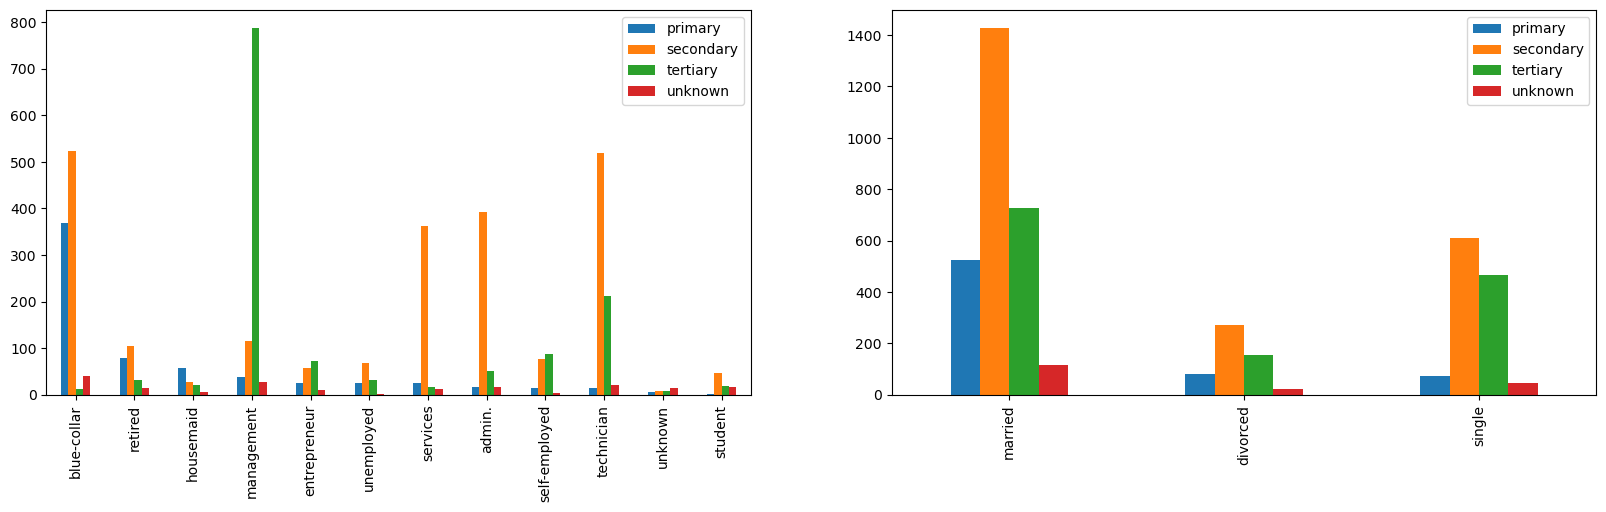

In [215]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)


edu_list = list(bank_csv['education'].unique())

edu_job = pd.DataFrame()
for edu in edu_list:
    edu_job[edu] = bank_csv[bank_csv['education'] == edu]['job'].value_counts()
edu_job.plot(kind='bar', ax=ax0)

edu_marital = pd.DataFrame()
for edu in edu_list:
    edu_marital[edu] = bank_csv[bank_csv['education'] == edu]['marital'].value_counts()
edu_marital.plot(kind='bar', ax=ax1, figsize=(20, 5))

**Conclusion**

1. Kebanyakan dari mereka di tiap bidang pekerjaan telah menyelesaikan secondary dan tertiary
2. Tidak ada perbedaan yang signifikan pada hubungan marital dengan education, hanya berbeda jumlah data yang diobservasi

## Correlation

**Visualization**

Bagian ini digunakan untuk melihat korelasi antar kolom.

In [ ]:
cat_col_list = bank_csv.columns[bank_csv.dtypes == 'category'].to_list()
for col in cat_col_list:
    bank_csv[col] = preprocessing.LabelEncoder().fit_transform(bank_csv[col])

x = bank_csv.iloc[:, 0:16]
y = bank_csv.iloc[:, -1]

corrmat = bank_csv.corr()
sns.heatmap(bank_csv[corrmat.index].corr(),cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.figure(figsize=(20, 20))
plt.show()

**Conclusion**

Dari hasil visualisasi heatmap, kolom duration memiliki korelasi paling kuat terhadap y dibandingkan kolom lainnya.

## Features Importance

Bagian ini digunakan untuk melihat kolom yang penting dan paling berpengaruh kepada kolom y.

In [ ]:
model = ExtraTreesClassifier()
model.fit(x, y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**Conclusion**

Sama seperti correlation, duration paling berpengaruh untuk kolom y. Selain duration, pengaruh paling besar selanjutnya diikuti oleh month, age, day, balance, job.

# Classification Models

Membuat set train dan test.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Logistic Regression

**Model**

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [ ]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

## K-Nearest Neighbors

**Model**

In [ ]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [ ]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

## SVM

**Model**

In [ ]:
model = svm.SVC()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [ ]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

## Decision Tree

**Model**

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [ ]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

## Random Forest

**Model**

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [ ]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

## Naive Bayes

**Model**

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [ ]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

# Algorithm Analysis

Untuk mengembangkan Machine Learning untuk dataset ini, maka model algoritma yang dipilih adalah Random Forest dikarenakan dari classification reportnya ditunjukkan bahwa akurasinya paling tinggi dibandingkan model algoritma lainnya.